# VGG-16 재훈련
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)


In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# II. Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [3]:
train_dir = './datasets/dogs_and_cats_small/train'
valid_dir = './datasets/dogs_and_cats_small/validation'
test_dir = './datasets/dogs_and_cats_small/test'

# III. Data Preprocessing

> ## 1) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# IV. Import VGG-16 Model

> ## 1) conv_base

In [5]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

# V. Keras CNN Modeling with VGG-16

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [8]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 35분

In [9]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 26s 198ms/step - loss: 0.5691 - accuracy: 0.6915 - val_loss: 0.3755 - val_accuracy: 0.8600
Epoch 2/100
100/100 [==============================] - 20s 199ms/step - loss: 0.2664 - accuracy: 0.8925 - val_loss: 0.1954 - val_accuracy: 0.9240
Epoch 3/100
100/100 [==============================] - 21s 206ms/step - loss: 0.1592 - accuracy: 0.9365 - val_loss: 0.1585 - val_accuracy: 0.9370
Epoch 4/100
100/100 [==============================] - 21s 207ms/step - loss: 0.1013 - accuracy: 0.9625 - val_loss: 0.1855 - val_accuracy: 0.9090
Epoch 5/100
100/100 [==============================] - 20s 200ms/step - loss: 0.0791 - accuracy: 0.9720 - val_loss: 0.1389 - val_accuracy: 0.9450
Epoch 6/100
100/100 [==============================] - 20s 199ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.1527 - val_accuracy: 0.9360
Epoch 7/100
100/100 [==============================] - 20s 199ms/step - loss: 0.0297 - accuracy: 0.9935 - val_loss: 0.1696 -

Epoch 56/100
100/100 [==============================] - 20s 198ms/step - loss: 2.9978e-05 - accuracy: 1.0000 - val_loss: 0.2564 - val_accuracy: 0.9530
Epoch 57/100
100/100 [==============================] - 20s 200ms/step - loss: 2.9876e-05 - accuracy: 1.0000 - val_loss: 0.2572 - val_accuracy: 0.9500
Epoch 58/100
100/100 [==============================] - 20s 201ms/step - loss: 4.0778e-05 - accuracy: 1.0000 - val_loss: 0.2602 - val_accuracy: 0.9520
Epoch 59/100
100/100 [==============================] - 20s 203ms/step - loss: 3.3323e-05 - accuracy: 1.0000 - val_loss: 0.2558 - val_accuracy: 0.9510
Epoch 60/100
100/100 [==============================] - 20s 204ms/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.1698 - val_accuracy: 0.9410
Epoch 61/100
100/100 [==============================] - 20s 198ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 0.1667 - val_accuracy: 0.9470
Epoch 62/100
100/100 [==============================] - 20s 198ms/step - loss: 0.0055 - accuracy: 0.99

> ## 4) 학습 결과 시각화

* Loss Visualization

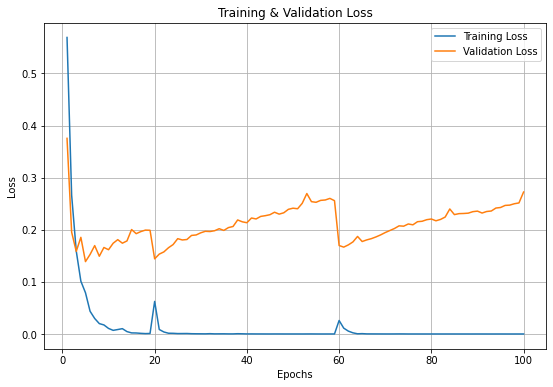

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

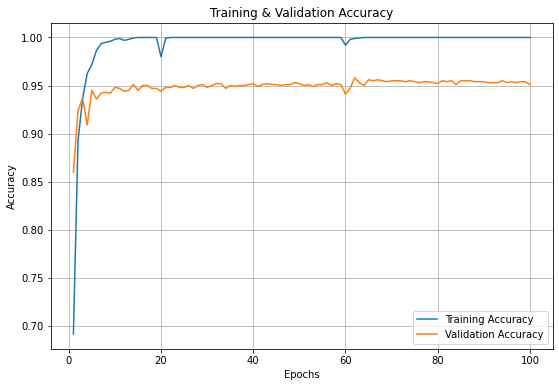

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [13]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 59ms/step - loss: 0.2895 - accuracy: 0.9530 0s - loss: 0.2986 - ac
Loss = 0.28946
Accuracy = 0.95300


# IV. Model Save

> ## 2) Model Save

In [14]:
model.save('./models/006_dogs_and_cats_VGG16.h5')

> ## 3) Model Load

In [15]:
from tensorflow.keras.models import load_model

model_google = load_model('./models/006_dogs_and_cats_VGG16.h5')

In [16]:
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 59ms/step - loss: 0.2895 - accuracy: 0.9530
Loss = 0.28946
Accuracy = 0.95300
